In [1]:
#Install dependency

#!pip3 install -r requirement.txt

    100% |████████████████████████████████| 51kB 863kB/s ta 0:00:01


In [1]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

### Standard Library
import cv2
from IPython.display import clear_output
import time
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

### Keras Library
import keras
from keras.models import load_model
import keras.backend as K

### Yolov3 Library
from utils.utils_tiny import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes

Using TensorFlow backend.


In [2]:
net_h, net_w = 416, 416 

obj_thresh, nms_thresh = 0.5, 0.45

anchor = [10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326]

labels = ["person","bicycle","car","motorbike","aeroplane","bus","train","truck","boat","traffic light","fire hydrant","stop sign","parking meter",
          "bench","bird","cat","dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack","umbrella","handbag","tie","suitcase","frisbee",
          "skis","snowboard","sports ball","kite","baseball bat","baseball glove","skateboard","surfboard","tennis racket","bottle","wine glass","cup","fork",
          "knife","spoon","bowl","banana","apple","sandwich","orange","broccoli","carrot","hot dog","pizza","donut","cake","chair","sofa","pottedplant","bed",
          "diningtable","toilet","tvmonitor","laptop","mouse","remote","keyboard","cell phone","microwave","oven","toaster","sink","refrigerator","book","clock",
          "vase","scissors","teddy bear","hair drier","toothbrush"]

# Load model
infer2_model = load_model("yolov3_tiny.h5")

##create output folder
output_path  = 'output/'
makedirs(output_path)

In [3]:
def showarray(a, fmt='jpeg'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    
def get_frame(cam):
    ret, frame = cam.read()
    frame = cv2.flip(frame, 1)
    return frame

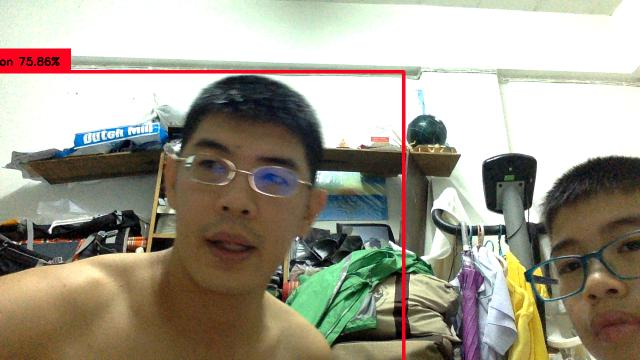

In [ ]:
video_reader = cv2.VideoCapture(0)

# the main loop
batch_size  = 1
images      = []

try:
    while True:
        ret_val, image = video_reader.read()
        if ret_val == True: images += [image]
        #if ret_val == True: images = [image]

        if (len(images)==batch_size) or (ret_val==False and len(images)>0):
            batch_boxes = get_yolo_boxes(infer2_model, images, net_h, net_w, anchor, obj_thresh, nms_thresh)
            clear_output(wait=True)
            for i in range(len(images)):
                draw_boxes(images[i], batch_boxes[i], labels, obj_thresh) 
                frame = cv2.resize(images[i],(640,360))
                showarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            images = []
            
except KeyboardInterrupt:
    print ("Stream stopped")
video_reader.release()